# Final Project

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tweepy
from textblob import TextBlob
import datetime
import time
import csv
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.preprocessing import Binarizer
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import TruncatedSVD
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


/Users/kislaynandan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
CONSUMER_KEY='X4MDIoCjcEsFnUuOV5t7Ramac'
CONSUMER_SECRET='4QEX8tdTBiWCP06XqAQITBUolwNou9l2xcQLHhoFyKduoazNhn'
ACCESS_KEY='2936608260-6TTgejpN0REXbUIeZdnNHcRnT9NXYNzYEkFSyxe'
ACCESS_SECRET='VLeGOTtztghXKp8I0eIumfDiBT8ZBoTVezsI702dH0gyd'

auth = tweepy.OAuth1UserHandler(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth)

def get_all_tweets(media1):
    tweets = []
    for account in media1:
        max_id = None
        tweet_count = 0
        while True:
            if max_id:
                recent_tweets = api.user_timeline(screen_name=account, count=200, max_id=max_id-1, tweet_mode="extended")
            else:
                recent_tweets = api.user_timeline(screen_name=account, count=200, tweet_mode="extended")
            if len(recent_tweets) == 0:
                break
            for tweet in recent_tweets:
                tweet_id = tweet.id
                created_at = tweet.created_at
                full_text = tweet.full_text
                if hasattr(tweet, "retweeted_status"):
                    try:
                        full_text = tweet.retweeted_status.full_text
                    except AttributeError:
                        full_text = tweet.retweeted_status.text
                screen_name = tweet.user.screen_name
                tweets.append((tweet_id, created_at, full_text, screen_name))
                tweet_count += 1
                if tweet_count == 5000:
                    break      
            if tweet_count == 5000:
                break
            max_id = recent_tweets[-1].id
    df = pd.DataFrame(tweets)
    df.to_csv('senttweets.csv', index=False)
    return df

In [7]:
media1=['MacRumors','9to5mac','iMore','appleinsider','TechCrunch','MKBHD']
media1_corpus=get_all_tweets(media1)



In [16]:
media1_corpus

,0,1,2,3
0,1653557339742695424,2023-05-03 00:29:26+00:00,Apple Maps Redesign Now Rolling Out in Taiwan ...,MacRumors
1,1653511293142446080,2023-05-02 21:26:27+00:00,Apple Adding Thunderbolt Display and Original ...,MacRumors
2,1653495404342792208,2023-05-02 20:23:19+00:00,"The latest iOS 16.5, iPadOS 16.5, and macOS Ve...",MacRumors
3,1653483711063785473,2023-05-02 19:36:51+00:00,PSA: Latest macOS Ventura 13.4 Beta Doesn’t Pl...,MacRumors
4,1653480657979604992,2023-05-02 19:24:43+00:00,"Apple Releases New Firmware for AirPods Pro, A...",MacRumors
...,...,...,...,...
19469,1401957382624796676,2021-06-07 17:41:01+00:00,Also I might be crazy but I really dig this iO...,MKBHD
19470,1401957124750692357,2021-06-07 17:40:00+00:00,iPadOS 15 widgets can finally go anywhere on t...,MKBHD
19471,1401955846620422146,2021-06-07 17:34:55+00:00,iOS 15 new feature summary 👍🏾 https://t.co/FtX...,MKBHD
19472,1401955639635714064,2021-06-07 17:34:06+00:00,"So many great, thought fun new features!\n\nI ...",MKBHD


In [84]:
df1 = media1_corpus[media1_corpus[2].str.contains("Iphone", case=False)].copy()
df1

,0,1,2,3
15,1653415880376844291,2023-05-02 15:07:19+00:00,Uber Eats Rolling Out Support for Tracking Ord...,MacRumors
24,1653090757002117136,2023-05-01 17:35:24+00:00,"Mother’s Day Deals: Save on iPhones, AirPods, ...",MacRumors
37,1652011726844600320,2023-04-28 18:07:43+00:00,Apple Pay Later Financing Feature Continues Ro...,MacRumors
49,1651585376161771520,2023-04-27 13:53:33+00:00,EarPods With USB-C Said to Be in Mass Producti...,MacRumors
53,1651532877174300680,2023-04-27 10:24:56+00:00,Future Apple Watch Update to Enable Pairing Wi...,MacRumors
...,...,...,...,...
19377,1408529128425504769,2021-06-25 20:54:48+00:00,Phone cameras are so good now compared to 10 y...,MKBHD
19403,1407335667252801536,2021-06-22 13:52:24+00:00,@theunlockr Definitely a huge driver. Who know...,MKBHD
19404,1407335195297079299,2021-06-22 13:50:32+00:00,It’s wild how there’s rumors and articles for ...,MKBHD
19454,1402597198215405577,2021-06-09 12:03:25+00:00,"NEW VIDEO - Why iPhone's Features are Always ""...",MKBHD


In [85]:

def clean_tweet(x):
    x = re.sub(r"@\S+", "", x)
    x = re.sub(r"http\S+", "", x)
    x = re.sub(r"[^a-zA-Z0-9 ]", "", x)
    x = x.lower().strip()
    return x
df1["cleaned_tweet"]=df1.loc[:,2].apply(clean_tweet)
df1.to_csv('cleanedsenttweets.csv', index=False)
df1

,0,1,2,3,cleaned_tweet
15,1653415880376844291,2023-05-02 15:07:19+00:00,Uber Eats Rolling Out Support for Tracking Ord...,MacRumors,uber eats rolling out support for tracking ord...
24,1653090757002117136,2023-05-01 17:35:24+00:00,"Mother’s Day Deals: Save on iPhones, AirPods, ...",MacRumors,mothers day deals save on iphones airpods case...
37,1652011726844600320,2023-04-28 18:07:43+00:00,Apple Pay Later Financing Feature Continues Ro...,MacRumors,apple pay later financing feature continues ro...
49,1651585376161771520,2023-04-27 13:53:33+00:00,EarPods With USB-C Said to Be in Mass Producti...,MacRumors,earpods with usbc said to be in mass productio...
53,1651532877174300680,2023-04-27 10:24:56+00:00,Future Apple Watch Update to Enable Pairing Wi...,MacRumors,future apple watch update to enable pairing wi...
...,...,...,...,...,...
19377,1408529128425504769,2021-06-25 20:54:48+00:00,Phone cameras are so good now compared to 10 y...,MKBHD,phone cameras are so good now compared to 10 y...
19403,1407335667252801536,2021-06-22 13:52:24+00:00,@theunlockr Definitely a huge driver. Who know...,MKBHD,definitely a huge driver who knows how many pe...
19404,1407335195297079299,2021-06-22 13:50:32+00:00,It’s wild how there’s rumors and articles for ...,MKBHD,its wild how theres rumors and articles for li...
19454,1402597198215405577,2021-06-09 12:03:25+00:00,"NEW VIDEO - Why iPhone's Features are Always ""...",MKBHD,new video why iphones features are always late


From Here

In [86]:
# Exercise 3.2. Preprocessing - Create Term Frequency Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

df1=pd.read_csv('cleanedsenttweets.csv')
# Let's remove domain specific stop words like 'said'
from nltk.corpus import stopwords
stop = list(stopwords.words('english')) + ['said']

# LDA can only use raw term counts for LDA 
tf_vectorizer = CountVectorizer(min_df=5, stop_words=stop)
tf = tf_vectorizer.fit_transform(df1['cleaned_tweet'])

# each feature is a word (bag of words)
# get_feature_names() gives all words
tf_feature_names = tf_vectorizer.get_feature_names()

print(tf_feature_names[0:50])
print(tf.shape)

# split dataset into train (90%) and test sets (10%)
# the test sets will be used to evaluate proplexity of topic modeling
X_train, X_test = train_test_split(\
                tf, test_size=0.1, random_state=0)

['10', '100', '1000', '11', '12', '13', '14', '14s', '15', '15s', '16', '161', '162', '163', '1631', '164', '17', '20', '200', '2022', '2023', '2024', '2025', '23', '25', '250', '30', '300', '35', '39', '3d', '3nm', '48mp', '49', '50', '50000', '59', '5g', '6e', '6gb', '70', '80', '9to5mac', '9to5toys', 'a15', 'a16', 'a17', 'accept', 'access', 'accessories']
(2540, 957)


/Users/kislaynandan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [87]:
# Exercise 3.3. Train LDA model
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 4

# Run LDA. For details, check
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation.perplexity

# max_iter control the number of iterations 
# evaluate_every determines how often the perplexity is calculated
# n_jobs is the number of parallel threads
lda = LatentDirichletAllocation(n_components=num_topics, \
                                max_iter=30,verbose=1,
                                evaluate_every=1, n_jobs=1,
                                random_state=0).fit(X_train)

iteration: 1 of max_iter: 30, perplexity: 431.2629
iteration: 2 of max_iter: 30, perplexity: 392.1567
iteration: 3 of max_iter: 30, perplexity: 375.6600
iteration: 4 of max_iter: 30, perplexity: 367.5226
iteration: 5 of max_iter: 30, perplexity: 362.5061
iteration: 6 of max_iter: 30, perplexity: 358.8606
iteration: 7 of max_iter: 30, perplexity: 356.3285
iteration: 8 of max_iter: 30, perplexity: 354.5851
iteration: 9 of max_iter: 30, perplexity: 353.2877
iteration: 10 of max_iter: 30, perplexity: 352.3472
iteration: 11 of max_iter: 30, perplexity: 351.3234
iteration: 12 of max_iter: 30, perplexity: 350.4753
iteration: 13 of max_iter: 30, perplexity: 349.8689
iteration: 14 of max_iter: 30, perplexity: 349.3659
iteration: 15 of max_iter: 30, perplexity: 348.8077
iteration: 16 of max_iter: 30, perplexity: 348.2143
iteration: 17 of max_iter: 30, perplexity: 347.6498
iteration: 18 of max_iter: 30, perplexity: 347.1887
iteration: 19 of max_iter: 30, perplexity: 346.7421
iteration: 20 of max_

In [88]:
# Exercise 3.4. Check topic and word distribution per topic

num_top_words=20

# lda.components_ returns a KxN matrix
# for word distribution in each topic.
# Each row consists of 
# pseudo-counts of each word that represents 
# the number of times word j was assigned to topic i. 
# It can also be viewed as distribution over the words 
# for each topic after normalization

for topic_idx, topic in enumerate(lda.components_):
    print ("Topic %d:" % (topic_idx))
    # print out top 20 words per topic 
    words=[(tf_feature_names[i],'%.2f'%topic[i]) \
           for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")

Topic 0:
[('iphone', '723.02'), ('pro', '418.09'), ('15', '342.24'), ('14', '238.07'), ('new', '136.01'), ('apple', '98.59'), ('display', '90.24'), ('camera', '87.24'), ('max', '82.74'), ('models', '79.87'), ('video', '62.14'), ('usbc', '61.47'), ('island', '58.24'), ('dynamic', '57.24'), ('rumors', '53.23'), ('pros', '53.10'), ('feature', '50.76'), ('ios', '50.45'), ('ultra', '50.23'), ('rumored', '47.90')]


Topic 1:
[('iphone', '564.04'), ('14', '240.13'), ('apple', '121.81'), ('apples', '71.69'), ('new', '54.86'), ('ios', '53.65'), ('launch', '50.23'), ('production', '45.24'), ('satellite', '44.24'), ('pro', '35.47'), ('could', '35.46'), ('emergency', '34.87'), ('plus', '33.32'), ('sos', '32.25'), ('features', '31.67'), ('india', '30.76'), ('ahead', '30.46'), ('next', '30.09'), ('via', '29.24'), ('feature', '28.38')]


Topic 2:
[('iphone', '459.73'), ('apple', '304.08'), ('iphones', '137.23'), ('new', '89.59'), ('app', '81.24'), ('users', '57.73'), ('apples', '42.17'), ('store', '4

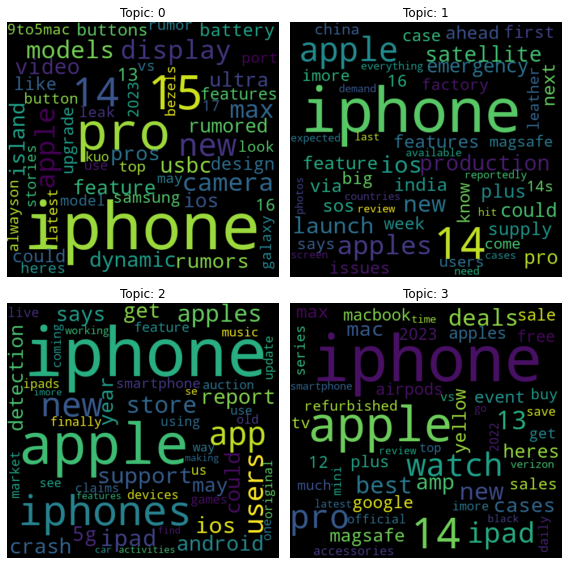

In [89]:
# Visualize topics 

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

num_top_words=50
f, axarr = plt.subplots(2, 2, figsize=(8, 8));

for topic_idx, topic in enumerate(lda.components_):
    # create a dataframe with two columns (word, weight) for each topic
    
    # create a word:count dictionary
    f={tf_feature_names[i]:topic[i] for i in topic.argsort()[::-1][0:num_top_words]}
    
    # generate wordcloud in subplots
    wordcloud = WordCloud(width=480, height=450, margin=0, background_color="black");
    _ = wordcloud.generate_from_frequencies(frequencies=f);
    
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].imshow(wordcloud, interpolation="bilinear");
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].set_title("Topic: "+str(topic_idx));
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].axis('off')

plt.tight_layout()
plt.show()


In [91]:
# Exercise 3.5. Assign documents to topic
import numpy as np
np.set_printoptions(suppress=True,precision=3)

# Generate topic assignment of each document
topic_assign=lda.transform(X_train)

# Show topic mixture for the first 6 documents
print(topic_assign[0:5])


[[0.75  0.015 0.219 0.015]
 [0.028 0.223 0.47  0.279]
 [0.028 0.579 0.03  0.363]
 [0.038 0.889 0.037 0.036]
 [0.021 0.022 0.021 0.935]]


In [92]:
# Exercise 3.6. Evaluate topic models by perplexity of test data

perplexity=lda.perplexity(X_test)
print("perplexity: {:.2f}".format(perplexity))


perplexity: 2107.66


In [93]:
# Exercise 4.1 How to find the best number of topics?
# Vary variable num_topics, e.g. set it to 2, 3, 5, ...
# For each value, train LDA model, 
# calculate perplexity on the test data

import numpy as np
import matplotlib.pyplot as plt

result=[]
for num_topics in range(2,10):
    lda = LatentDirichletAllocation(n_components=num_topics, \
                                learning_method='online', \
                                max_iter=30,verbose=0, n_jobs=1,
                                random_state=0).fit(X_train)
    p=lda.perplexity(X_test)
    result.append([num_topics,p])
    print(num_topics, p)



2 1021.3954354615273
3 1534.0240238884976
4 1969.631915334257
5 2597.2010288040833
6 3061.6235166681495
7 3375.4571138898996
8 3871.079319033321
9 4358.998614424632


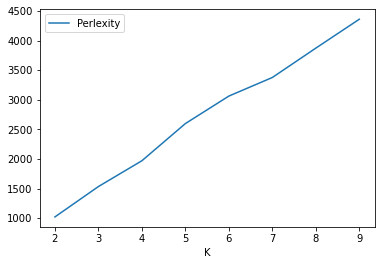

In [94]:
import pandas as pd
pd.DataFrame(result, columns=["K", "Perlexity"]).plot.line(x='K',y="Perlexity");
plt.show();

In [95]:
# 5.1. Create LDA model using the same TF matrix generated from sklearn

import gensim
from gensim import corpora

# A corpus is TF matrix in the list format, e.g.:
# [[(0, 1), (1,2), (4, 1), ...], [...], ...]
# which shows the first document has words with id=0,1,4
# and the count of word 0 is 1, word 1 is 2, ...

# convert the gensim corpus from the sparse tf matrix
corpus = gensim.matutils.Sparse2Corpus(X_train, \
                            documents_columns=False)

# create the mapping between id and words
id2word={idx:w for idx, w in \
         enumerate(tf_vectorizer.get_feature_names())}

# create a gensim dictionary from the corpus
# a dictionary contains the frequency of each words 
# the mapping between ids and words
dictionary = corpora.Dictionary.from_corpus(corpus, \
                            id2word=id2word)



/Users/kislaynandan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
# 6.2. Train LDA model

NUM_TOPICS = 4

# for detailed parameters, check
#https://radimrehurek.com/gensim/models/ldamodel.html

ldamodel = gensim.models.\
ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, \
                            id2word=id2word, \
                            iterations=30)

topics = ldamodel.print_topics(num_words=20)
for topic in topics:
    print(topic)
    print("\n")
    
# You may remove domain-specific stop words like 'said','company','com'. This may improve topics

(0, '0.128*"iphone" + 0.053*"14" + 0.027*"apple" + 0.018*"pro" + 0.018*"new" + 0.011*"deals" + 0.009*"heres" + 0.008*"best" + 0.008*"launch" + 0.008*"13" + 0.007*"check" + 0.007*"magsafe" + 0.007*"apples" + 0.006*"get" + 0.006*"15" + 0.006*"ahead" + 0.005*"following" + 0.005*"sales" + 0.005*"could" + 0.005*"16"')


(1, '0.122*"iphone" + 0.054*"14" + 0.054*"pro" + 0.038*"apple" + 0.027*"new" + 0.027*"15" + 0.010*"display" + 0.010*"max" + 0.009*"app" + 0.008*"watch" + 0.007*"features" + 0.007*"apples" + 0.006*"plus" + 0.005*"color" + 0.005*"store" + 0.005*"13" + 0.005*"even" + 0.005*"ios" + 0.005*"heres" + 0.005*"models"')


(2, '0.100*"iphone" + 0.064*"apple" + 0.028*"pro" + 0.023*"15" + 0.014*"ultra" + 0.013*"iphones" + 0.012*"new" + 0.011*"watch" + 0.010*"m2" + 0.009*"camera" + 0.008*"13" + 0.008*"ipad" + 0.008*"india" + 0.008*"made" + 0.007*"usbc" + 0.007*"macbook" + 0.007*"video" + 0.007*"tv" + 0.007*"review" + 0.006*"2023"')


(3, '0.124*"iphone" + 0.027*"apple" + 0.025*"14" + 0.01

In [97]:
# 6.3. visualize topics
import pyLDAvis
import pyLDAvis.gensim_models

lda_display = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary, sort_topics=True, R=20)
pyLDAvis.display(lda_display)

/Users/kislaynandan/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/kislaynandan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/kislaynandan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/kislaynandan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected 

In [62]:
from nltk.sentiment import SentimentIntensityAnalyzer

# initialize the analyzer
sid = SentimentIntensityAnalyzer()

# apply analyzer to each sentence in the cleaned_tweet column
#for sentence in df1['cleaned_tweet']:
    #print(sentence)
    #ss = sid.polarity_scores(sentence)
    #for k in sorted(ss):
    #    print('{0}: {1}, '.format(k, ss[k]))
    #print("\n")
# initialize analyzer
#sid = SentimentIntensityAnalyzer()

# create a new column for sentiment scores
df1['sentiment_scores'] = df1['cleaned_tweet'].apply(lambda x: sid.polarity_scores(x))

# create new columns for each sentiment score
df1['neg'] = df1['sentiment_scores'].apply(lambda x: x['neg'])
df1['neu'] = df1['sentiment_scores'].apply(lambda x: x['neu'])
df1['pos'] = df1['sentiment_scores'].apply(lambda x: x['pos'])
df1['compound'] = df1['sentiment_scores'].apply(lambda x: x['compound'])

# drop the 'sentiment_scores' column
df1 = df1.drop('sentiment_scores', axis=1)

# display the DataFrame
#print(df1.head())


In [63]:
df1

,0,1,2,3,cleaned_tweet,neg,neu,pos,compound
0,1653415880376844291,2023-05-02 15:07:19+00:00,Uber Eats Rolling Out Support for Tracking Ord...,MacRumors,uber eats rolling out support for tracking ord...,0.000,0.725,0.275,0.6486
1,1653090757002117136,2023-05-01 17:35:24+00:00,"Mother’s Day Deals: Save on iPhones, AirPods, ...",MacRumors,mothers day deals save on iphones airpods case...,0.000,0.789,0.211,0.4939
2,1652011726844600320,2023-04-28 18:07:43+00:00,Apple Pay Later Financing Feature Continues Ro...,MacRumors,apple pay later financing feature continues ro...,0.113,0.887,0.000,-0.1027
3,1651585376161771520,2023-04-27 13:53:33+00:00,EarPods With USB-C Said to Be in Mass Producti...,MacRumors,earpods with usbc said to be in mass productio...,0.000,1.000,0.000,0.0000
4,1651532877174300680,2023-04-27 10:24:56+00:00,Future Apple Watch Update to Enable Pairing Wi...,MacRumors,future apple watch update to enable pairing wi...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...
2535,1408529128425504769,2021-06-25 20:54:48+00:00,Phone cameras are so good now compared to 10 y...,MKBHD,phone cameras are so good now compared to 10 y...,0.000,0.828,0.172,0.5777
2536,1407335667252801536,2021-06-22 13:52:24+00:00,@theunlockr Definitely a huge driver. Who know...,MKBHD,definitely a huge driver who knows how many pe...,0.000,0.750,0.250,0.6124
2537,1407335195297079299,2021-06-22 13:50:32+00:00,It’s wild how there’s rumors and articles for ...,MKBHD,its wild how theres rumors and articles for li...,0.000,1.000,0.000,0.0000
2538,1402597198215405577,2021-06-09 12:03:25+00:00,"NEW VIDEO - Why iPhone's Features are Always ""...",MKBHD,new video why iphones features are always late,0.000,1.000,0.000,0.0000


In [64]:
df1.to_csv('toughtweets.csv', index=False)

Suppose you are using a pre-trained word embedding. Then you use this word embedding to train a RNN for sentiment classification. Your training set doesn't include the word "ecstatic", but you RNN should reasonably recognize this? to be positive

In [65]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv("toughtweets.csv")

# Function to label each tweet as positive, negative, or neutral based on the compound score
def label_sentiment(row):
    if row['compound'] > 0.05:
        return 'Positive'
    elif row['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the label_sentiment function to each row of the dataframe
df['label'] = df.apply(label_sentiment, axis=1)

# Print the first 5 rows of the updated dataframe
print(df.head())


                     0                          1  \
0  1653415880376844291  2023-05-02 15:07:19+00:00   
1  1653090757002117136  2023-05-01 17:35:24+00:00   
2  1652011726844600320  2023-04-28 18:07:43+00:00   
3  1651585376161771520  2023-04-27 13:53:33+00:00   
4  1651532877174300680  2023-04-27 10:24:56+00:00   

                                                   2          3  \
0  Uber Eats Rolling Out Support for Tracking Ord...  MacRumors   
1  Mother’s Day Deals: Save on iPhones, AirPods, ...  MacRumors   
2  Apple Pay Later Financing Feature Continues Ro...  MacRumors   
3  EarPods With USB-C Said to Be in Mass Producti...  MacRumors   
4  Future Apple Watch Update to Enable Pairing Wi...  MacRumors   

                                       cleaned_tweet    neg    neu    pos  \
0  uber eats rolling out support for tracking ord...  0.000  0.725  0.275   
1  mothers day deals save on iphones airpods case...  0.000  0.789  0.211   
2  apple pay later financing feature continues 

In [66]:
df


,0,1,2,3,cleaned_tweet,neg,neu,pos,compound,label
0,1653415880376844291,2023-05-02 15:07:19+00:00,Uber Eats Rolling Out Support for Tracking Ord...,MacRumors,uber eats rolling out support for tracking ord...,0.000,0.725,0.275,0.6486,Positive
1,1653090757002117136,2023-05-01 17:35:24+00:00,"Mother’s Day Deals: Save on iPhones, AirPods, ...",MacRumors,mothers day deals save on iphones airpods case...,0.000,0.789,0.211,0.4939,Positive
2,1652011726844600320,2023-04-28 18:07:43+00:00,Apple Pay Later Financing Feature Continues Ro...,MacRumors,apple pay later financing feature continues ro...,0.113,0.887,0.000,-0.1027,Negative
3,1651585376161771520,2023-04-27 13:53:33+00:00,EarPods With USB-C Said to Be in Mass Producti...,MacRumors,earpods with usbc said to be in mass productio...,0.000,1.000,0.000,0.0000,Neutral
4,1651532877174300680,2023-04-27 10:24:56+00:00,Future Apple Watch Update to Enable Pairing Wi...,MacRumors,future apple watch update to enable pairing wi...,0.000,1.000,0.000,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...
2535,1408529128425504769,2021-06-25 20:54:48+00:00,Phone cameras are so good now compared to 10 y...,MKBHD,phone cameras are so good now compared to 10 y...,0.000,0.828,0.172,0.5777,Positive
2536,1407335667252801536,2021-06-22 13:52:24+00:00,@theunlockr Definitely a huge driver. Who know...,MKBHD,definitely a huge driver who knows how many pe...,0.000,0.750,0.250,0.6124,Positive
2537,1407335195297079299,2021-06-22 13:50:32+00:00,It’s wild how there’s rumors and articles for ...,MKBHD,its wild how theres rumors and articles for li...,0.000,1.000,0.000,0.0000,Neutral
2538,1402597198215405577,2021-06-09 12:03:25+00:00,"NEW VIDEO - Why iPhone's Features are Always ""...",MKBHD,new video why iphones features are always late,0.000,1.000,0.000,0.0000,Neutral


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Compound Values over Time')

Text(0.5, 0, 'Number of Tweets')

Text(0, 0.5, 'Compound Value')

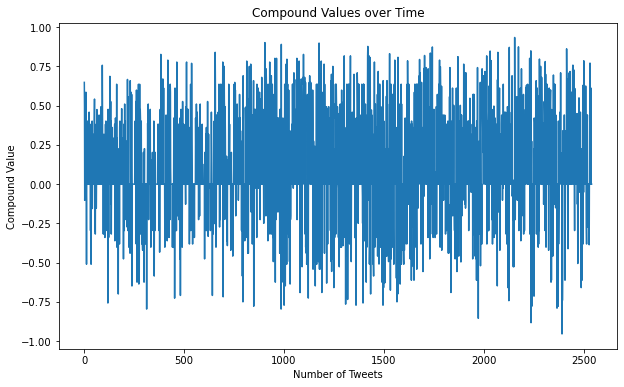

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = df

plt.figure(figsize=(10, 6))

# Plot the compound values
plt.plot(data["compound"])
plt.title("Compound Values over Time")
plt.xlabel("Number of Tweets")
plt.ylabel("Compound Value")
plt.show()


In [69]:
x = df['compound'].mean()


In [70]:
x

0.0931496850393702

In [57]:
# build the function to analyze semantic network

def build_semantic_network(df):
    stop_words = set(stopwords.words("english"))
    vectorizer = CountVectorizer(stop_words=stop_words, min_df=2, max_features=50)
    X = vectorizer.fit_transform(df["cleaned_tweet"].values)
    vocab = vectorizer.get_feature_names_out()
    binarizer = Binarizer()
    cooccurrence = binarizer.fit_transform(X.T.dot(X))
    n_components = min(cooccurrence.shape) - 1
    svd = TruncatedSVD(n_components=n_components)
    svd.fit(cooccurrence)
    X_svd = svd.transform(cooccurrence)
    distances = pairwise_distances(X_svd, metric="cosine")
    G = nx.Graph()
    G.add_nodes_from(vocab)
    for i, word1 in enumerate(vocab):
        for j, word2 in enumerate(vocab):
            if i < j and cooccurrence[i, j] > 0:
                G.add_edge(word1, word2, weight=cooccurrence[i, j])
    centrality = nx.eigenvector_centrality(G)
    node_sizes = [centrality[word] * 5000 for word in G.nodes()]
    nx.set_node_attributes(G, dict(zip(G.nodes(), node_sizes)), "size")
    return G, node_sizes, centrality

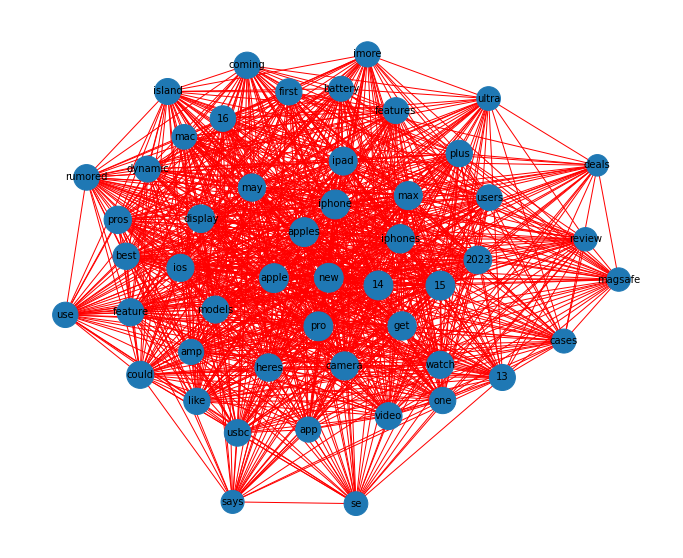

In [58]:

graph, node_sizes, centrality = build_semantic_network(df1)
fig, ax = plt.subplots(figsize=(12, 10))
nx.draw(graph, with_labels=True, node_size=node_sizes, font_color='black', font_size=10,edge_color='red', ax=ax)
plt.show()

In [75]:
sentiments = []
df = pd.read_csv("cleanedsenttweets.csv")
for tweet in df.iloc[:,2]:
    blob = TextBlob(tweet)
    sentiment = blob.sentiment.polarity
    sentiments.append(sentiment)

df['sentiment'] = sentiments
df

,0,1,2,3,cleaned_tweet,sentiment
0,1653415880376844291,2023-05-02 15:07:19+00:00,Uber Eats Rolling Out Support for Tracking Ord...,MacRumors,uber eats rolling out support for tracking ord...,0.000000
1,1653090757002117136,2023-05-01 17:35:24+00:00,"Mother’s Day Deals: Save on iPhones, AirPods, ...",MacRumors,mothers day deals save on iphones airpods case...,0.500000
2,1652011726844600320,2023-04-28 18:07:43+00:00,Apple Pay Later Financing Feature Continues Ro...,MacRumors,apple pay later financing feature continues ro...,0.000000
3,1651585376161771520,2023-04-27 13:53:33+00:00,EarPods With USB-C Said to Be in Mass Producti...,MacRumors,earpods with usbc said to be in mass productio...,0.000000
4,1651532877174300680,2023-04-27 10:24:56+00:00,Future Apple Watch Update to Enable Pairing Wi...,MacRumors,future apple watch update to enable pairing wi...,0.000000
...,...,...,...,...,...,...
2535,1408529128425504769,2021-06-25 20:54:48+00:00,Phone cameras are so good now compared to 10 y...,MKBHD,phone cameras are so good now compared to 10 y...,0.350000
2536,1407335667252801536,2021-06-22 13:52:24+00:00,@theunlockr Definitely a huge driver. Who know...,MKBHD,definitely a huge driver who knows how many pe...,0.300000
2537,1407335195297079299,2021-06-22 13:50:32+00:00,It’s wild how there’s rumors and articles for ...,MKBHD,its wild how theres rumors and articles for li...,0.200000
2538,1402597198215405577,2021-06-09 12:03:25+00:00,"NEW VIDEO - Why iPhone's Features are Always ""...",MKBHD,new video why iphones features are always late,-0.081818


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Sentiment Values over Time using Text Blob')

Text(0.5, 0, 'Number of Tweets')

Text(0, 0.5, 'Sentiment Value')

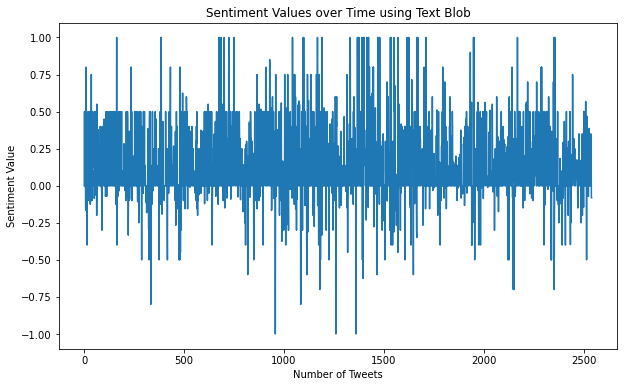

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = df

plt.figure(figsize=(10, 6))

# Plot the compound values
plt.plot(data["sentiment"])
plt.title("Sentiment Values over Time using Text Blob")
plt.xlabel("Number of Tweets")
plt.ylabel("Sentiment Value")
plt.show()


In [81]:
x = df['sentiment'].mean()
x

0.11952164848129394